11490434/11490434 [==============================] - 1s 0us/step


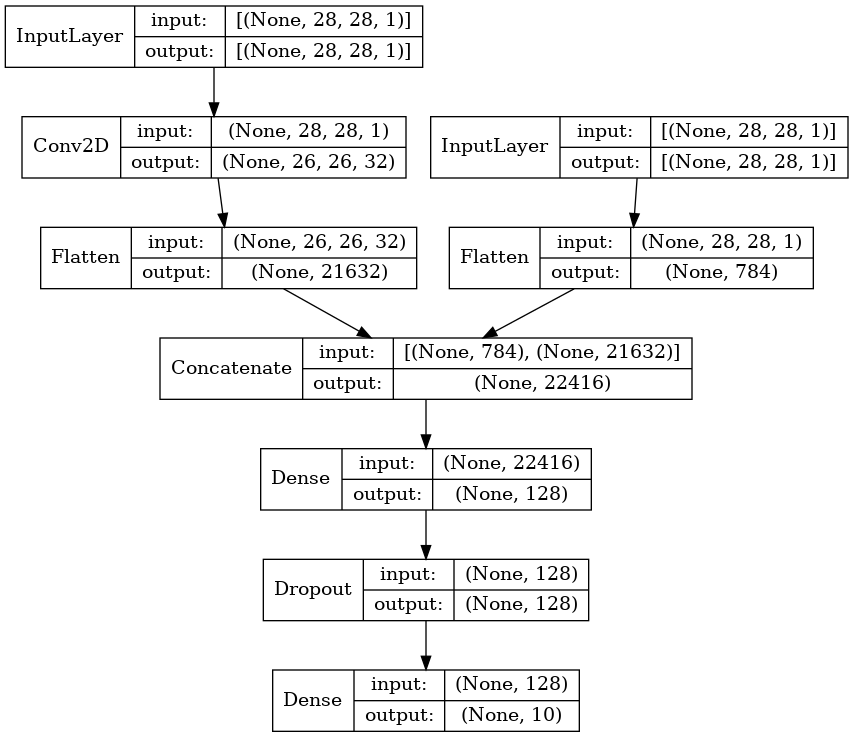

In [3]:
import keras
from keras import Input
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.utils import plot_model

# load the MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# define our model
input1 = Input(shape=(28, 28, 1))
input2 = Input(shape=(28, 28, 1))
input2c = Conv2D(32, kernel_size=(3, 3), activation="relu")(input2)
joint = keras.layers.concatenate([Flatten()(input1), Flatten()(input2c)])
out = Dense(10, activation="softmax")(
    Dropout(0.2)(Dense(128, activation="relu")(joint))
)
model = keras.models.Model(inputs=[input1, input2], outputs=out)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
plot_model(model, to_file='model-mnist.png', show_shapes=True, show_layer_names=False, expand_nested=True)

In [4]:
# fit the model
model.fit([x_train, x_train], y_train, epochs=3)

2024-01-09 04:31:02.205960: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/3


2024-01-09 04:31:03.750635: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 45s 24ms/step - loss: 0.1631 - accuracy: 0.9509
Epoch 2/3
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0603 - accuracy: 0.9810
Epoch 3/3
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0442 - accuracy: 0.9855


In [22]:
# y_test[2]  1
y_test[10:11] 

array([0], dtype=uint8)

In [25]:
import shap

# since we have two inputs we pass a list of inputs to the explainer
explainer = shap.GradientExplainer(model, [x_test, x_test])

# we explain the model's predictions on the first three samples of the test set
shap_values = explainer.shap_values([x_test[10:11], x_test[10:11]])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


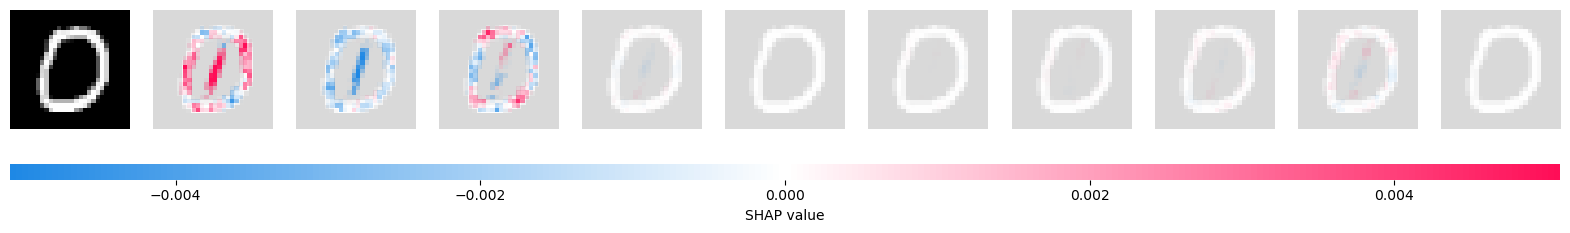

In [24]:
#选择1 作为背景数据
shap.image_plot([shap_values[i][0] for i in range(10)], x_test[10:11])

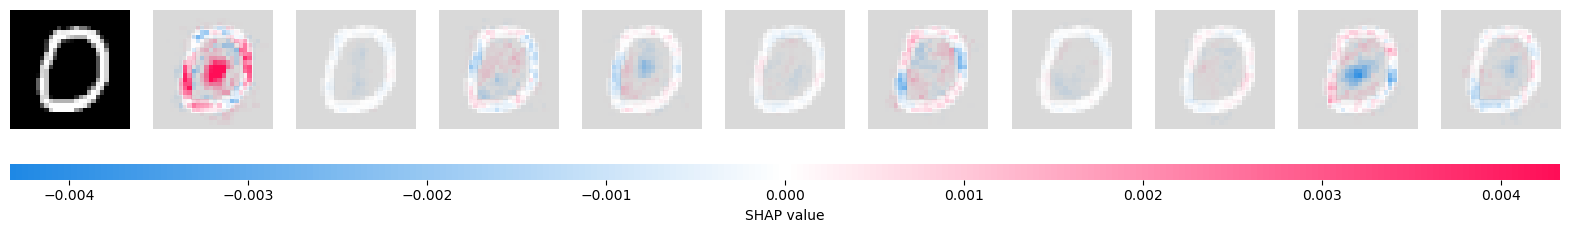

In [26]:
#随机选择背景数据
shap.image_plot([shap_values[i][0] for i in range(10)], x_test[10:11])

In [5]:
import shap

# since we have two inputs we pass a list of inputs to the explainer
explainer = shap.GradientExplainer(model, [x_train, x_train])

# we explain the model's predictions on the first three samples of the test set
shap_values = explainer.shap_values([x_test[:3], x_test[:3]])

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [6]:
# since the model has 10 outputs we get a list of 10 explanations (one for each output)
print(len(shap_values))

10


In [7]:
# since the model has 2 inputs we get a list of 2 explanations (one for each input) for each output
print(len(shap_values[0]))

2


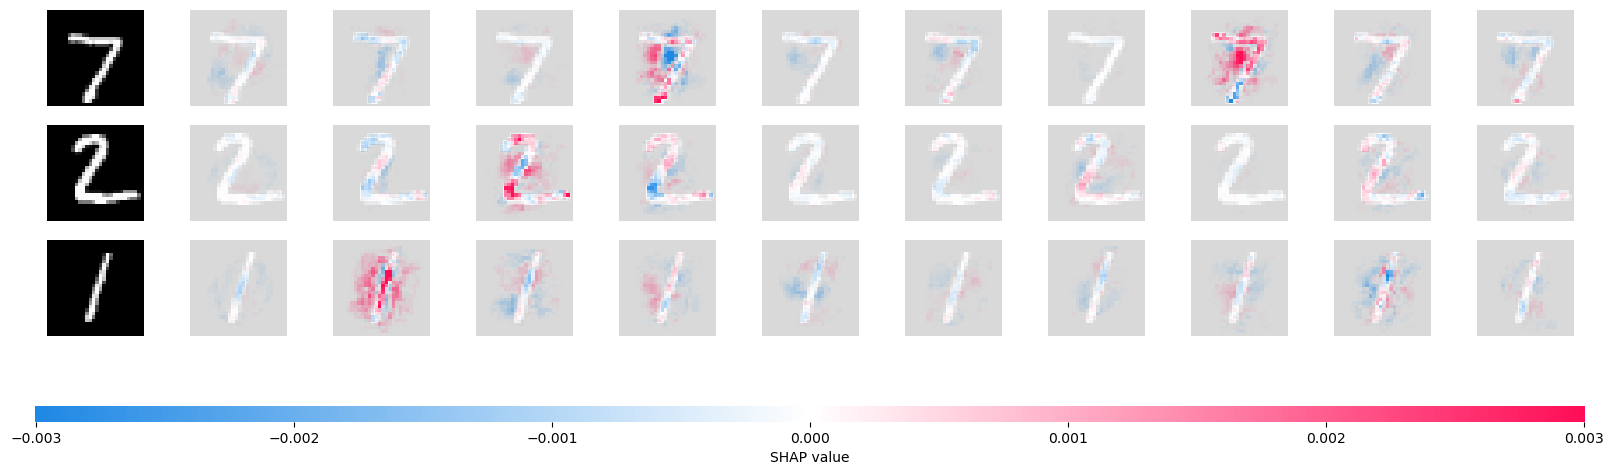

In [8]:
# here we plot the explanations for all classes for the first input (this is the feed forward input)
shap.image_plot([shap_values[i][0] for i in range(10)], x_test[:3])

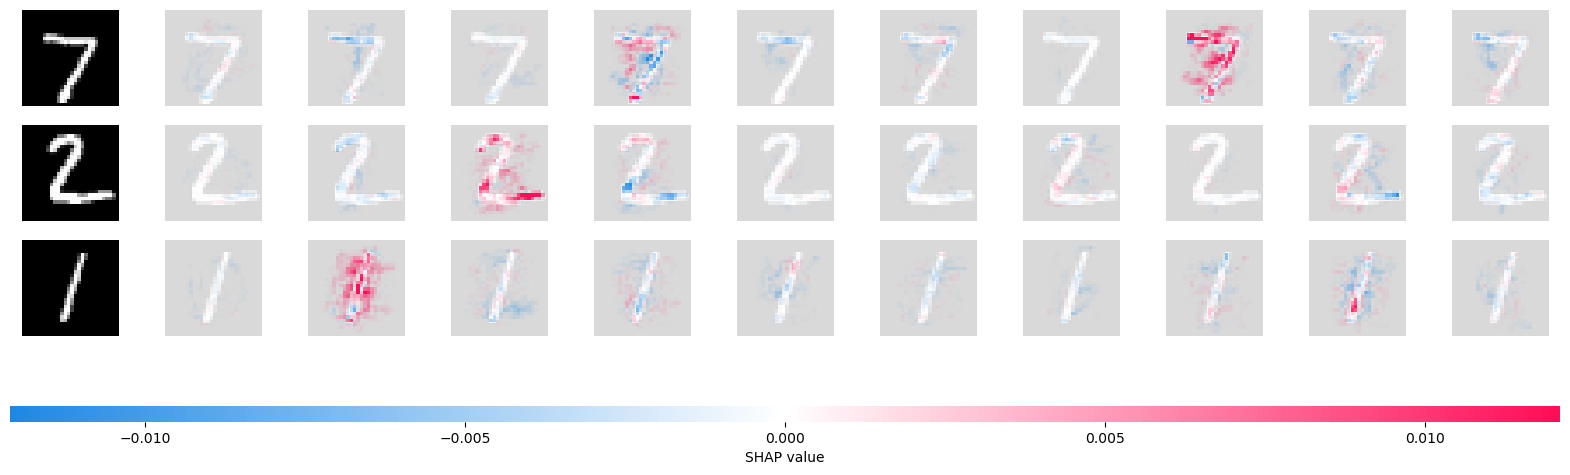

In [9]:
# here we plot the explanations for all classes for the second input (this is the conv-net input)
shap.image_plot([shap_values[i][1] for i in range(10)], x_test[:3])

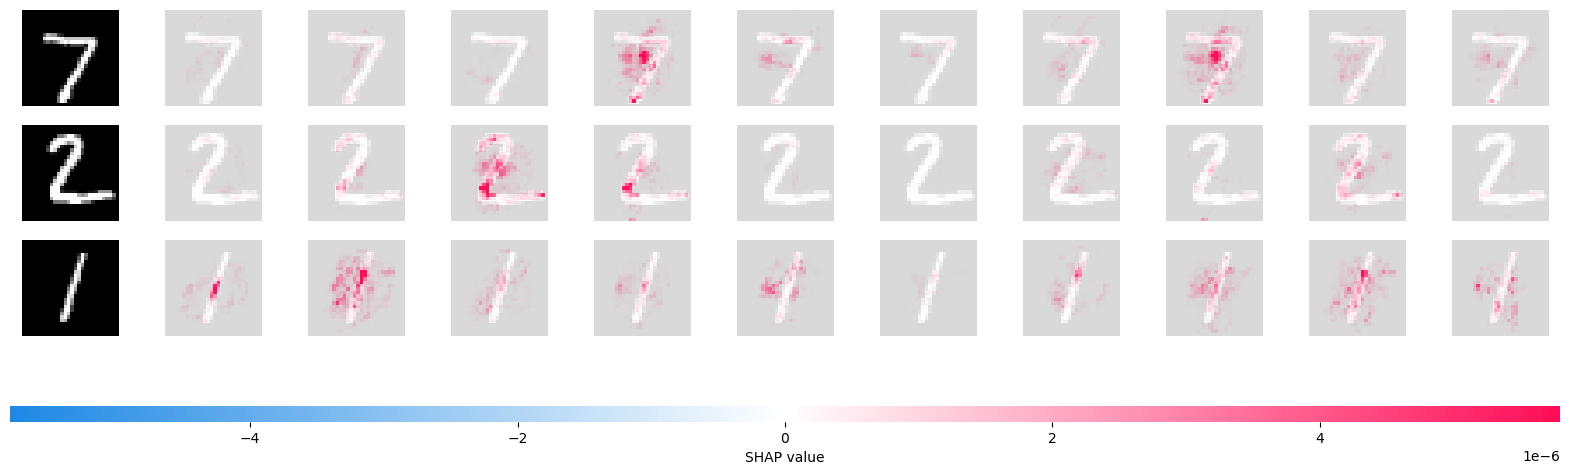

In [10]:
# get the variance of our estimates
shap_values, shap_values_var = explainer.shap_values(
    [x_test[:3], x_test[:3]], return_variances=True
)
# here we plot the explanations for all classes for the first input (this is the feed forward input)
shap.image_plot([shap_values_var[i][0] for i in range(10)], x_test[:3])

In [29]:
# this is the code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 32
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
            #   optimizer=keras.optimizers.Adadelta(),
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12


2024-01-12 02:12:09.503139: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 24s 12ms/step - loss: 0.2075 - accuracy: 0.9376 - val_loss: 0.0856 - val_accuracy: 0.9715
Epoch 2/12
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0800 - accuracy: 0.9763 - val_loss: 0.0605 - val_accuracy: 0.9804
Epoch 3/12
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0603 - accuracy: 0.9816 - val_loss: 0.0566 - val_accuracy: 0.9816
Epoch 4/12
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0501 - accuracy: 0.9848 - val_loss: 0.0508 - val_accuracy: 0.9838
Epoch 5/12
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0435 - accuracy: 0.9863 - val_loss: 0.0495 - val_accuracy: 0.9845
Epoch 6/12
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0375 - accuracy: 0.9887 - val_loss: 0.0510 - val_accuracy: 0.9854
Epoch 7/12
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0457 - val_accura

In [30]:
#自定义的选择背景数据和要解释的样本，n为数量，number为类，通过读取标签选择对应样本并添加到列表中，当达到设定数量n后，跳出循环，将所得数据打包
import numpy as np
def data_choice(n, number):
    print("选择数据：%d %d个"%(number,n))
    data_list=[]
    for i in range(1,x_train.shape[0]):
        if(np.argmax(y_train[i-1])==number):
            data_list.append(x_train[i-1])
        if(len(data_list)==n):
            break
    return np.stack(data_list)

In [31]:
test_tmp = data_choice(100, 0)

选择数据：0 100个


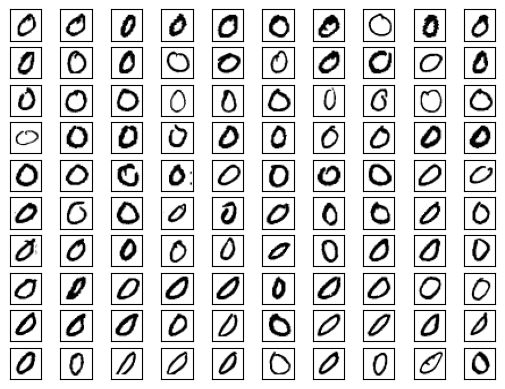

In [32]:
from matplotlib import pyplot as plt


for j in range (1,len(test_tmp)+1):
    plt.subplot(10, 10, j)
    plt.imshow(-test_tmp[j - 1], cmap='gray')  # train_images  test_images
    plt.xticks([])
    plt.yticks([])
plt.show()

In [43]:
# background = data_choice(100, 9)
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
# e = shap.DeepExplainer(model, background)
# print(e.expected_value)
e = shap.GradientExplainer(model,background)

选择数据：0 4个


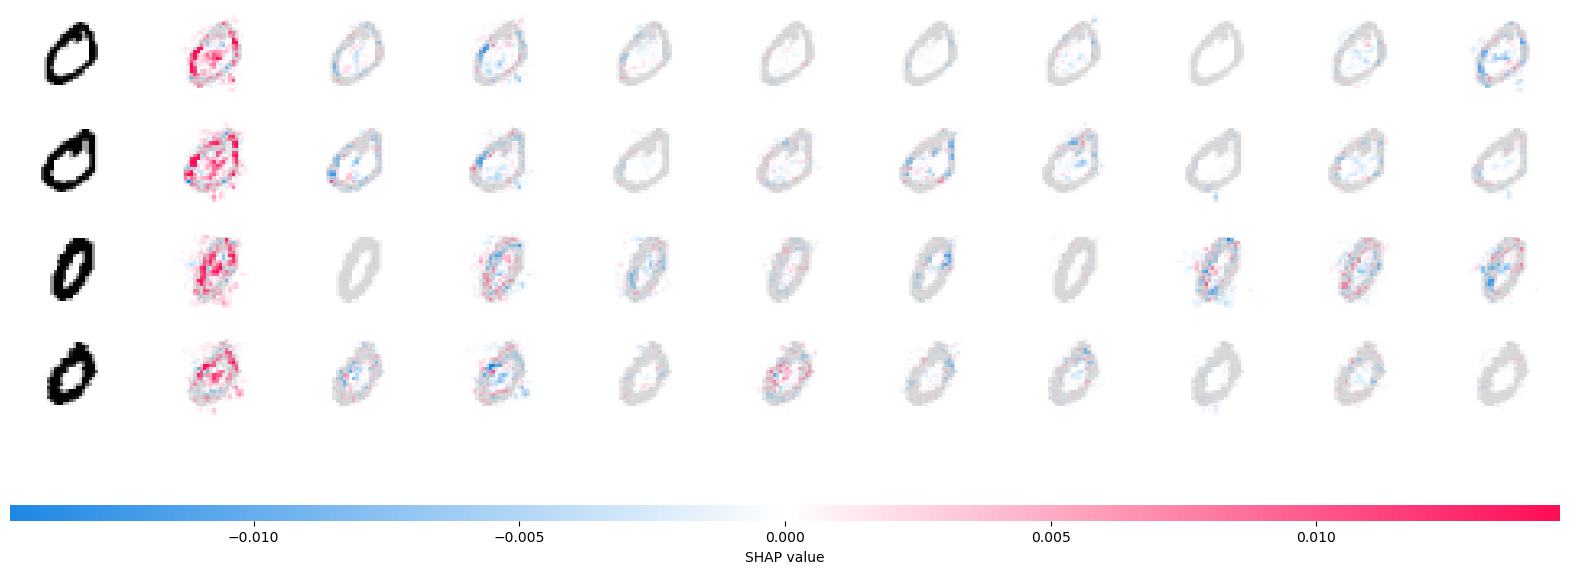

In [45]:
ex_data = data_choice(4,0)
shap_values = e.shap_values(ex_data)
# plot the feature attributions
shap.image_plot(shap_values, -ex_data)

选择数据：1 4个


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


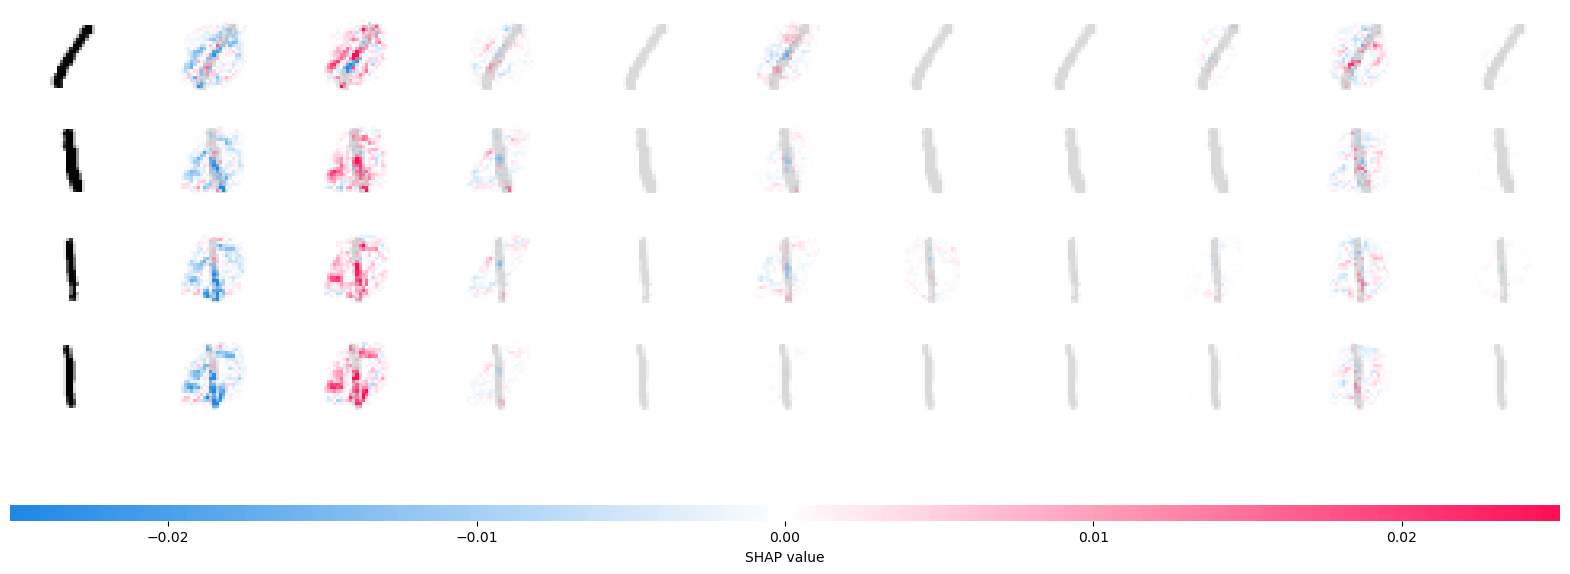

In [36]:
ex_data = data_choice(4,1)
shap_values = e.shap_values(ex_data)
# plot the feature attributions
shap.image_plot(shap_values, -ex_data)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 96, 16)            64        
                                                                 
 global_max_pooling1d_2 (Gl  (None, 16)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


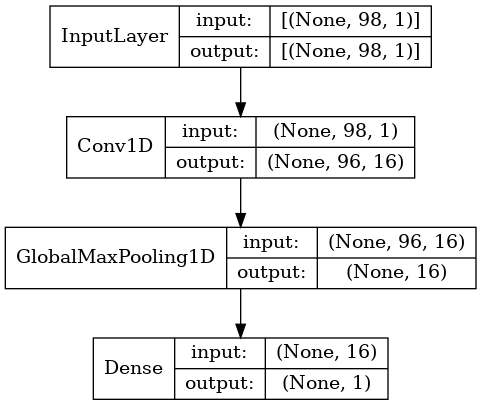

In [52]:

from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Dense
import numpy as np

# 生成示例数据，其中包含不同长度的一维向量
data = [np.random.rand(np.random.randint(5, 100)) for _ in range(100)]

# 获取最大长度
max_length = max(len(seq) for seq in data)

# # 转换为numpy数组
# data = np.array(data)

# 创建卷积神经网络模型
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(max_length, 1)))
model.add(GlobalMaxPooling1D())  # 或者使用 GlobalAveragePooling1D()
model.add(Dense(units=1, activation='sigmoid'))

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 模型训练


# 输出模型结构
model.summary()


plot_model(model, to_file='FCN.png', show_shapes=True, show_layer_names=False, expand_nested=True)
